### This is a WordCloud (or an attempt to) from all the papers published by the group

First, we import all the libraries. We're going to be using wordcloud library to build the cloud and matplotlib to plot and save the image.

In [61]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re # for removing the punctuation
import nltk

We first build two functions: one to remove the paragraph `(\n)` and remove all the punctuations from the papers `!?.:;,"()-`.

In [62]:
def remove_paragraph(word):
    return re.sub(r'[\n]', "", word)
def remove_punctuation(word):
    return re.sub(r'[!?.:;,"()-]', "", word.lower()) 

Reading and treating the text (removing punctuation and remove paragraph) from all the paper titles:

In [63]:
# Opening the file
with open("artigos_grupo.txt", encoding="utf8") as line:
    artigos = line.readlines()
artigos_formatado = str()

# Applying the function to each one of the articles
for artigo in artigos:
    artigos_formatado += (remove_punctuation(remove_paragraph(artigo)))

artigos_formatado

"use of machine learning approaches for novel drug discoverynitric oxide state of the art in drug designdesign and synthesis of new ecinnamic nacylhydrazones as potent antitrypanosomal agentsquantitative structure–activity relationships for a series of inhibitors of cruzain from trypanosoma cruzi molecular modeling comfa and comsia studiesstructureactivity relationships for a class of selective inhibitors of the major cysteine protease from trypanosoma cruzipharmacological evaluation and preparation of nonsteroidal antiinflammatory drugs containing an nacyl hydrazone subunitenantioselective arylations catalyzed by carbohydrate‐based chiral amino alcoholscruzain inhibition by hydroxymethylnitrofurazone and nitrofurazone investigation of a new target in trypanosoma cruzitheoretical study of tautomers and photoisomers of avobenzone by dft methodscaracterização físicoquímica de complexo de inclusão entre hidroximetilnitrofurazona e hidroxipropilbetaciclodextrinanew tuberculostatic agents t

Because our text has portugues and english words, we have to concat portuguese and english stopwords. For reading about stopwords refer to: https://pt.wikipedia.org/wiki/Palavra_vazia

In [101]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese') # portuguese stopwords
stopwords_en = nltk.corpus.stopwords.words('english') # english stopwords

# Joining both of them
stopwords_pt.extend(stopwords_en)

# Transforming into a set
stopwords_all = set(stopwords_pt)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'até',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'com',
 'como',
 'couldn',
 "couldn't",
 'd',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'dos',
 'down',
 'during',
 'e',
 'each',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'est

Now we finally generate the wordcloud using the `WordCloud` functions.

In [104]:
# Generating the wordcloud
wordcloud = WordCloud(width = 1400, height = 1200, background_color = "white",
                     stopwords = stopwords_all, min_font_size = 10).generate(artigos_formatado)

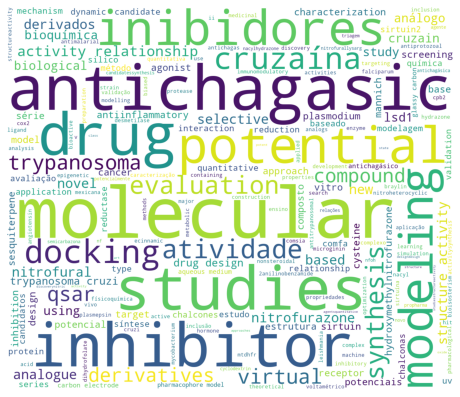

In [112]:
# Ploting the figures
plt.figure(figsize = (8,8), facecolor = None)
plt.axis("off")
plt.imshow(wordcloud)

# Saving the figures
plt.savefig("word_cloud_lab", dpi = 300)